In [11]:
# Imports


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks, optimizers

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

## Exercise 1:  Training Deep Neural Network on MNIST

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3394 - loss: 1.9490 - val_accuracy: 0.7400 - val_loss: 1.0112
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8139 - loss: 0.7518 - val_accuracy: 0.8150 - val_loss: 0.6876
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8845 - loss: 0.4431 - val_accuracy: 0.8250 - val_loss: 0.6268
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9235 - loss: 0.3046 - val_accuracy: 0.8350 - val_loss: 0.6218
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9528 - loss: 0.2178 - val_accuracy: 0.8450 - val_loss: 0.6315
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9722 - loss: 0.1576 - val_accuracy: 0.8300 - val_loss: 0.6545
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9759 - loss: 0.1148 - val_accuracy: 0.8300 - val_loss: 0.6985
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9855 - loss: 0.0837 - val_accuracy: 0.8200 - val_loss

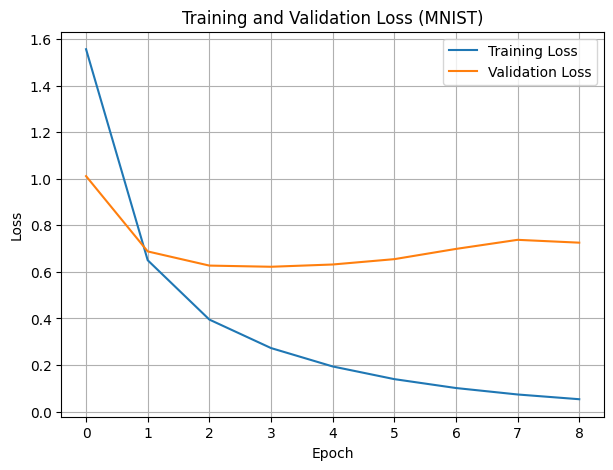

In [12]:
# Exercise 1

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Use only the first 1000 training and 200 test samples
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:200], y_test[:200]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Building the neurlal network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# Compiling tthe model
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating the model and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The model achieved a test accuracy of 88 % on the MNIST test set.

## Exercise 2 Deep neural network on CIFAR-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1273 - loss: 4.4314 - val_accuracy: 0.1890 - val_loss: 2.1669
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2423 - loss: 2.0740 - val_accuracy: 0.2520 - val_loss: 2.0223
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2989 - loss: 1.9440 - val_accuracy: 0.2880 - val_loss: 1.9696
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.8557 - val_accuracy: 0.2950 - val_loss: 1.9771
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3628 - loss: 1.8042 - val_accuracy: 0.3030 - val_loss: 1.9415
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3778 - loss: 1.7525 - val_accuracy: 0.3270 - val_loss: 1.9062
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3907 - loss: 1.6995 - val_accuracy: 0.3320 - val_loss: 1.8804
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

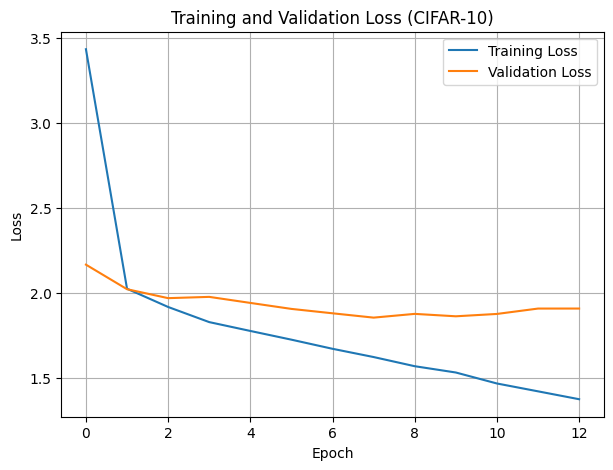

In [14]:
# Exercise 2 DNN on CIFAR-10

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use only the first 5000 training and 1000 test samples
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (32x32x3 -> 3072)
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

# Building the model
model = models.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# Compiling
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The model achieved a test accuracy of 34.8 % on the CIFAR-10 test set.